# Data Science

## Sentiment analysis

In this segment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



#### 1. Converting the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading the file
with open("/Users/harshitsrivastava/Desktop/Data/rfa_all.NL-SEPARATED.txt") as f:
    lines = f.readlines()
    
# Creating a dictionary
df = {}
for i in lines:
    # Removing bad lines from the data
    if i == "\n" or i == " ":
        continue
        
    # Splitting data into key-value pairs
    i = i.strip()
    key, value = i.split(":", 1)
    
    # Storing the values in the form of key, value pairs
    df.setdefault(key, [])
    # Appending the Key with multiple values
    df[key].append(value)

# Converting the dictionary to DataFrame
df = pd.DataFrame(df)

In [3]:
df.head()

,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013


#### 2. Using the VOT column as the target variable, coding the values as -1 or 0  as '0' and 1 to stay as '1'


In [4]:
# replacing the rows with -1 with 0
df['VOT'] = df['VOT'].replace('-1', '0')

In [9]:
%store df

Stored 'df' (DataFrame)


#### 3. Putting all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`
Creating a train/test split with 75% of the data to training

In [5]:
# Creating the Feature and Target variables
X = df['TXT']
Y = df['VOT']

# Splitting the data using train_test_split function from scikit learn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

#### 4. Creating a binary `CountVectorizer()` and `TfidfVectorizer()`
We'll be using the original single words as well as bigrams. Also, using an "english" stop word list. We will then fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [6]:
# Initializing Binary CountVectorizer, using single words as well as bigrams, using 'english' stop words list
binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english', encoding=u'utf-8')

# Fitting the training data
binary_vectorizer.fit(X_train)

# Transforming the datasets
df_train_binary = binary_vectorizer.transform(X_train)
df_test_binary = binary_vectorizer.transform(X_test)

# Initializing TfIdf Vectorizer, using single words as well as bigrams, using 'english' stop words list
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Fitting the training data
tfidf_vectorizer.fit(X_train)

# Transforming the datasets
df_train_tfidf = tfidf_vectorizer.transform(X_train)
df_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
# Sample Output
list(binary_vectorizer.vocabulary_.keys())[0:20]

[u'wikipedia surely',
 u'spidern',
 u'count_edits',
 u'cautious closing',
 u'rfa vetted',
 u'administrators focus',
 u'barometer admin',
 u'uses bag',
 u'helpful wp',
 u'using know',
 u'policy saying',
 u'better covered',
 u'time swing',
 u'temperment desired',
 u'doing demonstrate',
 u'came helped',
 u'consider does',
 u'creator respect',
 u'nom add',
 u'thoroughly reviewed']

#### 5. Using `LogisticRegression()` and `BernoulliNB()` models to predict the vote based on the input text. 
In a single plot, showing the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, the area under the ROC curve (AUC) is mentioned. 

(0, 1)

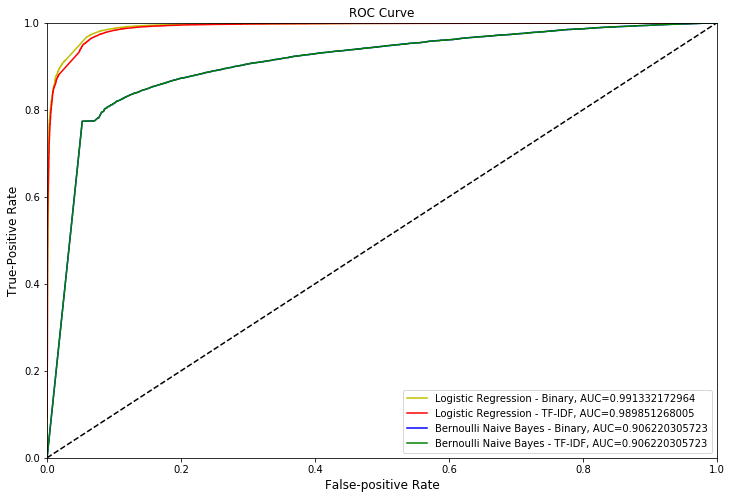

In [8]:
# Initializing the different models 
LR_model_binary = LogisticRegression()
LR_model_tfidf = LogisticRegression()
NB_model_binary = BernoulliNB()
NB_model_tfidf = BernoulliNB()

# Changing the string values to int
Y_test = np.array(Y_test).astype(int)

# 1 --- LOGISTIC REGRESSION MODEL
### Logistic Regression model for Binary Count Vectorizer
LR_model_binary.fit(df_train_binary, Y_train)
LR_binary_pred = LR_model_binary.predict_proba(df_test_binary)[:,1]
LR_binary_AUC = metrics.roc_auc_score(Y_test, LR_binary_pred)
LR_bin_fpr, LR_bin_tpr, LR_bin_thresh = metrics.roc_curve(Y_test, LR_model_binary.predict_proba(df_test_binary)[:,1])

### Logisitc Regression model for TF-IDF Vectorizer
LR_model_tfidf.fit(df_train_tfidf, Y_train)
LR_tfidf_pred = LR_model_tfidf.predict_proba(df_test_tfidf)[:,1]
LR_tfidf_AUC = metrics.roc_auc_score(Y_test, LR_tfidf_pred)
LR_tfidf_fpr, LR_tfidf_tpr, LR_tfidf_thresh = metrics.roc_curve(Y_test, LR_model_tfidf.predict_proba(df_test_tfidf)[:,1])

# 2 -- BERNOULLI NAIVE BAYES MODEL
### Bernoulli Naive Bayes model for Binary Vector Count Vectorizer
NB_model_binary.fit(df_train_binary, Y_train)
NB_binary_pred = NB_model_binary.predict_proba(df_test_binary)[:,1]
NB_binary_AUC = metrics.roc_auc_score(Y_test, NB_binary_pred)
NB_bin_fpr, NB_bin_tpr, NB_bin_thresh = metrics.roc_curve(Y_test, NB_model_binary.predict_proba(df_test_binary)[:,1])

### Bernoulli Naive Bayes model for TF-IDF Vectorizer
NB_model_tfidf.fit(df_train_binary, Y_train)
NB_tfidf_pred = NB_model_tfidf.predict_proba(df_test_tfidf)[:,1]
NB_tfidf_AUC = metrics.roc_auc_score(Y_test, NB_tfidf_pred)
NB_tfidf_fpr, NB_tfidf_tpr, NB_tfidf_thresh = metrics.roc_curve(Y_test, NB_model_tfidf.predict_proba(df_test_tfidf)[:,1])

# PLOTTING THE ROC CURVE
### Setting the figure size
plt.figure(figsize=[12, 8])

### Plotting the different models using different colors and using label to depict the AUC score
plt.plot(LR_bin_fpr, LR_bin_tpr, label='Logistic Regression - Binary, AUC='+str(LR_binary_AUC), color = 'y')
plt.plot(LR_tfidf_fpr, LR_tfidf_tpr, label='Logistic Regression - TF-IDF, AUC='+str(LR_tfidf_AUC), color = 'r')
plt.plot(NB_bin_fpr, NB_bin_tpr, label='Bernoulli Naive Bayes - Binary, AUC='+str(NB_binary_AUC), color = 'b')
plt.plot(NB_tfidf_fpr, NB_tfidf_tpr, label='Bernoulli Naive Bayes - TF-IDF, AUC='+str(NB_tfidf_AUC), color = 'g')
### Plotting the 45 degree line
plt.plot([0, 1], [0, 1],'k--')
### Labelling the axes, adding Title and limiting the window
plt.xlabel("False-positive Rate", fontsize = 'large')
plt.ylabel("True-Positive Rate", fontsize = 'large')
plt.title("ROC Curve", fontsize = 'large')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])

#### Which model do you think is doing a better job?
    
<span style="color:blue">
As we can see from the figure, Logistic Regression has better AUC scores for both the methods. This may be due to the fact that Naive Bayes makes an assumption that the input features are conditionally independent of each other given the output label. NB considers all feature weights independently so when there is correlation between the features, NB double-counts the weights and doubles the influence on the decision. Logistic Regression model on the other hand considers all features together, so, when there is correlation between the features, it compensates by splitting the difference and lowering the weights. Here, in text data, there is high correlation amongst the features themselves which is in effect lowering down the accuracy of NB model as it is over-estimating the correlated features, LR on the other hand is facing no issues in this case and performing better than NB and getting a near perfect score.

</span>
</p>